In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from tqdm import tqdm

%matplotlib inline

df = pd.read_csv('avy_X-y.csv', index_col='Unnamed: 0')

In [2]:
print(df.columns)
print(len(df))
df.count()

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth',
       'pressure', 'above', 'below', 'near', 'storm_slabs', 'wet_slabs',
       'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       'loose_dry'],
      dtype='object')
28084


Temperature_m               28084
Relative_Humidity_m         28084
Temperature_tl              28084
Relative_Humidity_tl        28084
Wind_Speed_Average_tl       28084
Wind_Speed_Maximum_tl       28084
Wind_Direction_(deg.)_tl    28084
precip                      28084
depth                       28084
pressure                    28084
above                        9910
below                        9910
near                         9910
storm_slabs                  9910
wet_slabs                    9910
persistent                   9910
wind_slab                    9910
loose_wet                    9910
glide                        9910
cornices                     9910
loose_dry                    9910
dtype: int64

In [3]:
df.describe()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure,...,below,near,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
count,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,28084.000000,...,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000,9910.000000
mean,41.339892,69.057256,40.457058,71.833346,5.993869,13.218412,232.492375,0.010882,35.258536,1016.170093,...,1.932492,2.335116,0.456206,0.031483,0.053280,0.803229,0.519677,0.009687,0.160747,0.036428
std,14.189910,24.539394,14.509618,28.395706,4.859696,8.174939,106.053639,0.034144,42.258102,6.079356,...,0.753626,0.762826,0.498104,0.174629,0.224602,0.397578,0.499638,0.097951,0.367316,0.187362
min,3.229000,4.673000,5.743000,4.038000,-0.036000,0.000000,0.005000,0.000000,0.000000,990.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.880000,48.310000,29.200000,46.875000,1.492750,7.160000,106.300000,0.000000,2.905000,1013.212000,...,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.380000,76.045000,37.900000,82.500000,5.577500,12.960000,286.700000,0.000000,11.260000,1017.278000,...,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,50.840000,91.900000,51.105000,99.400000,9.330000,18.380000,310.500000,0.000000,69.307500,1020.165250,...,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,86.800000,100.000000,85.000000,100.000000,41.900000,72.800000,360.000000,0.740000,143.700000,1034.949000,...,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Prediction 1:
# Storm Slab

### Storm slab is formed during storms and tends to stabilize very quickly (~3 days after snowfall typical; definitely should resolve within a week)

y = NWAC's forecast of storm slab: 0 or 1 at time T
X = weather conditions, 5 days prior to T 
_possible revision to model: 5 days before and up to 24 hours after (because NWAC may predict storm slab as a hazard when a storm is coming in in the afternoon) - see if this is relevant_

In [4]:
y_all = df.storm_slabs   # np.npdarray 

In [5]:
# relevant methods for manipluating y

print(y_all.values.shape)
print(y_all.count())
print(y_all.unique())
print(y_all.iloc[:5].isna())
print('...')
print(y_all.iloc[-5:].isna())
print()
y_ok = y_all[~y_all.isna()]
print('y_ok.__len__() =', len(y_ok))

(28084,)
9910
[ nan   1.   0.]
2014-09-23 09:00:00    True
2014-09-23 10:00:00    True
2014-09-23 11:00:00    True
2014-09-23 12:00:00    True
2014-09-23 13:00:00    True
Name: storm_slabs, dtype: bool
...
2017-12-07 20:00:00    False
2017-12-07 21:00:00    False
2017-12-07 22:00:00    False
2017-12-07 23:00:00    False
2017-12-08 00:00:00    False
Name: storm_slabs, dtype: bool

y_ok.__len__() = 9910


In [6]:
df.precip = df.precip.apply(lambda x: x*100)

In [7]:
cols = ['Temperature_m', 'Temperature_tl', 'Wind_Speed_Average_tl', 'Wind_Speed_Maximum_tl', 'precip', 'depth',] 
# cols to use

data = df[cols]
       
       #'above', 'below', 'near', 'storm_slabs', 'wet_slabs', 'Relative_Humidity_m',
       #'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       #'loose_dry', 'Relative_Humidity_tl',  'Wind_Direction_(deg.)_tl',]

In [8]:
print(data.values.shape)
print()
print(data.count())
# ok so: y is 9910 samples; these samples correspond to timestamps from a subset of the data
print()
print(len(data[~y_all.isna()]), '= number of data corresponding to y_ok')
print()
print(data.loc[y_ok.index[0]])

(28084, 6)

Temperature_m            28084
Temperature_tl           28084
Wind_Speed_Average_tl    28084
Wind_Speed_Maximum_tl    28084
precip                   28084
depth                    28084
dtype: int64

9910 = number of data corresponding to y_ok

Temperature_m            29.510
Temperature_tl           27.630
Wind_Speed_Average_tl     2.554
Wind_Speed_Maximum_tl    11.110
precip                    0.000
depth                     9.220
Name: 2014-12-20 00:00:00, dtype: float64


In [10]:
# find i | x[i] matches index of y[j]
# only have to run it once!

dicty = {}    # map from .iloc index of y: corresponding .iloc index of data

lower_limit = 0
for i in range(len(y_ok)):
    for j in range(lower_limit, len(data)):
        if data.index[j] == y_ok.index[i]:
            dicty[i] = j
            lower_limit = j
            break

In [11]:
dicty[0]

2103

In [12]:
data.values.shape

(28084, 6)

In [60]:
fl = 16  # fl = forward looking - ie. how far forward to look in hours
days = 3

X_multiseries = np.empty((len(y_ok) - fl, 24*days, len(data.columns)))   
# 9910 - 30 samples because last day goes into future; days of weather info * 24hours/day  x  columns

for i in range(len(y_ok) - fl):
    X_multiseries[i] = data.values[dicty[i] - 24*(days) + fl: dicty[i] + fl]
    
# X is now a dataset with 'days' days worth of weather for each y

y = y_ok[:-fl]
X_multiseries.shape

(9894, 72, 6)

In [61]:
# look at some X s

def view_x(i, X=X_multiseries, label=y.values):
    # view i-th sample of multiseries data
    print(' \n\n#####')
    x = X[i]
    for s in range(x.shape[-1]):  # for series index:
        plt.scatter(range(len(x[:, s])), x[:, s])
    plt.show()
    print(label[i])

 

#####


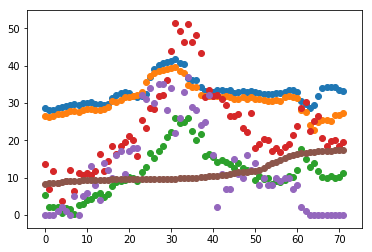

1.0
 

#####


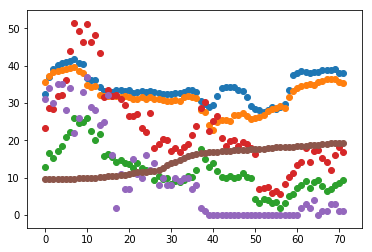

0.0


In [62]:
view_x(48)  # danger of storm slab

view_x(72)  # no danger

New idea:
# Replace X with DCT transform of X

### dimensionality reduction by eliminating HF noise

For dataset, use DCT of time series points; this is the same information but easy to compress by deleting HF components. Most of the info is stored in the 0th component (mean) and the 1st component (trend left-right).

In [90]:
from sklearn.ensemble import RandomForestRegressor as RF

rf = RF(n_estimators=50, n_jobs=-1, max_features=12, max_depth=10)

In [91]:
X_transform = X_multiseries.copy()   # copy old dataset; transform will be same shape.

for time_series in tqdm(range(X_multiseries.shape[-1])):
    X_transform[:, :, time_series] = dct(X_multiseries[:, :, time_series])

100%|██████████| 6/6 [00:00<00:00, 61.02it/s]


 

#####


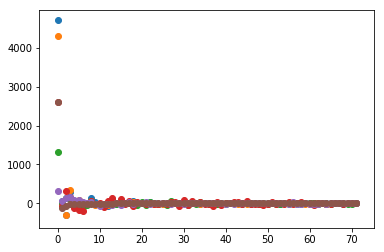

1.0


In [92]:
view_x(100, X=X_transform)
# looks about right...

In [93]:
# remove HF data... keep ? transform components
print(X_transform.shape)
X_transform = X_transform[:, :2, :]  # ?
print(X_transform.shape)

(9894, 72, 6)
(9894, 2, 6)


In [94]:
# flatten for single learner:
X = np.empty((X_transform.shape[0], X_transform.shape[1] * X_transform.shape[2]))
for i in range(len(X)):
    X[i] = X_transform[i].flatten()

In [95]:
split = -2000
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]   # y is a DataFrame
y_test = y[split:]

X_train[0]

array([ 4433.5       ,  4201.72      ,   630.664     ,  1690.404     ,
         590.        ,  1120.283     ,    44.14444129,    30.10867315,
        -162.32682946,  -269.18777519,  -351.25614823,  -121.16181373])

In [96]:
# fit each RF to a series (X predict y_train: 0.0...1.0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [97]:
rf.score(X_train, y_train)

0.95793606359289774

In [98]:
rf.score(X_test, y_test)

0.053129450538609187

In [57]:
for t in range(2):
    time = 68 + t * 100
    view_x(time, X_train)  # no danger
    print(X_train_meta[time])
    print(y_train.index[time])
    print('massive overfitting ?')

 

#####


IndexError: too many indices for array

In [58]:
plt.scatter(range(500), X_train_meta[:500].mean(axis=1))
plt.scatter(range(500), y_train.values[:500], alpha=1, s=3)
# n_estimators = 3

NameError: name 'X_train_meta' is not defined

In [131]:
X_test_meta = np.empty((X_test.shape[0], X_test.shape[-1]))
for i in tqdm(range(X_test.shape[-1])):
    X_test_meta[:, i] = multi_rf[i].predict(X_test[:, :, i])

X_test_meta.shape

100%|██████████| 6/6 [00:00<00:00,  9.57it/s]


(2000, 6)

In [132]:
zp = (zip(cols, X_test_meta.mean(axis=0)))
for item in zp:
    print(item)
y_test.mean()

('Temperature_m', 0.54109999999999958)
('Temperature_tl', 0.49729999999999952)
('Wind_Speed_Average_tl', 0.54620000000000113)
('Wind_Speed_Maximum_tl', 0.54499999999999993)
('precip', 0.61209999999999798)
('depth', 0.26279999999999831)


0.35599999999999998

In [133]:
cols
y_test_pred = X_test_meta.mean(axis=1)

correct = 0
for i in range(len(y_test)):
    if y_test.values[i] != np.round(y_test_pred[i]):
        # print(i, y_test.values[i], y_test_pred[i])
        pass
    else:
        correct += 1
        
print(correct, 'of', len(y_test))

1234 of 2000


 

#####


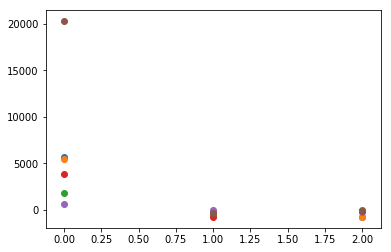

1.0
0.766666666667
[ 1.   1.   0.6  0.6  1.   0.4]
2017-02-10 11:00:00
 

#####


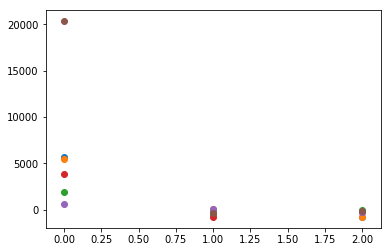

1.0
0.733333333333
[ 1.   1.   0.4  0.8  1.   0.2]
2017-02-10 15:00:00
 

#####


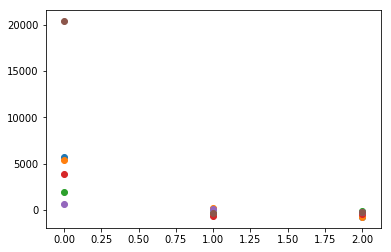

1.0
0.733333333333
[ 1.   0.8  0.8  0.8  1.   0. ]
2017-02-10 19:00:00
 

#####


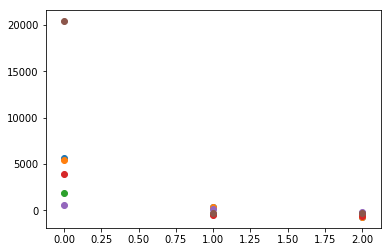

1.0
0.533333333333
[ 0.2  0.4  0.6  1.   1.   0. ]
2017-02-10 23:00:00
 

#####


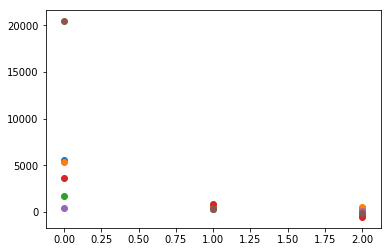

1.0
0.433333333333
[ 0.6  1.   0.   0.   1.   0. ]
2017-02-12 02:00:00
 

#####


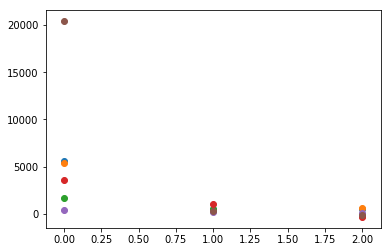

1.0
0.333333333333
[ 0.8  0.2  0.2  0.   0.8  0. ]
2017-02-12 06:00:00
 

#####


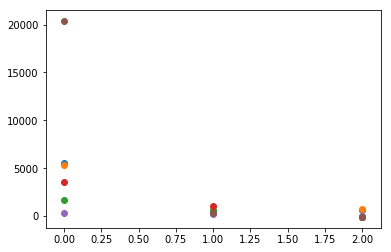

1.0
0.433333333333
[ 0.8  0.4  0.   0.6  0.8  0. ]
2017-02-12 10:00:00
 

#####


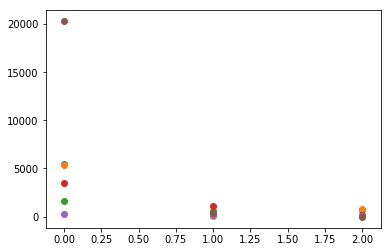

1.0
0.4
[ 1.   0.   0.4  0.8  0.2  0. ]
2017-02-12 14:00:00
 

#####


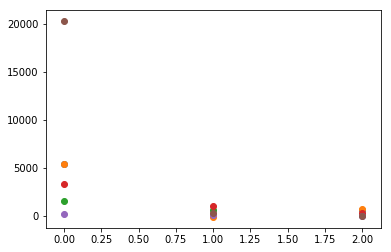

1.0
0.366666666667
[ 1.   0.   0.2  0.2  0.8  0. ]
2017-02-12 18:00:00
 

#####


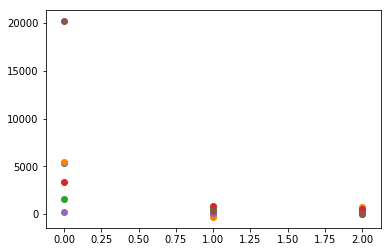

1.0
0.466666666667
[ 1.   0.   0.8  0.4  0.4  0.2]
2017-02-12 22:00:00
 

#####


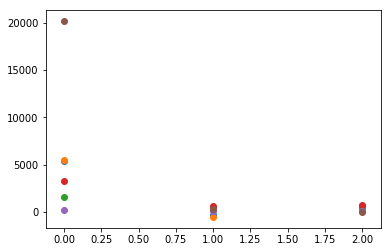

1.0
0.466666666667
[ 1.   0.   0.6  0.2  0.4  0.6]
2017-02-13 02:00:00
 

#####


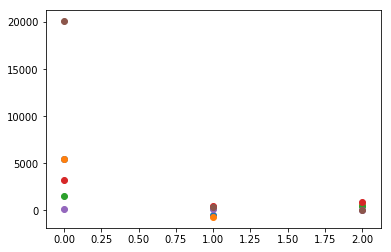

1.0
0.5
[ 0.4  0.   1.   1.   0.   0.6]
2017-02-13 06:00:00
 

#####


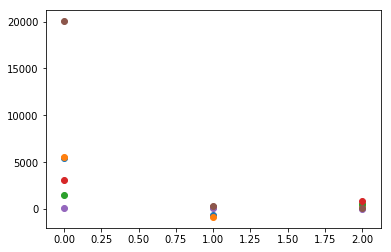

1.0
0.4
[ 0.2  0.   0.6  1.   0.   0.6]
2017-02-13 10:00:00
 

#####


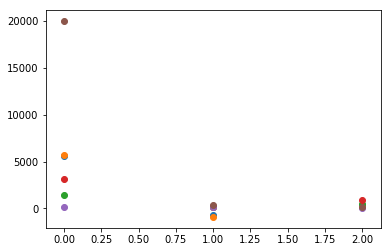

1.0
0.433333333333
[ 0.   0.   1.   1.   0.   0.6]
2017-02-13 14:00:00
 

#####


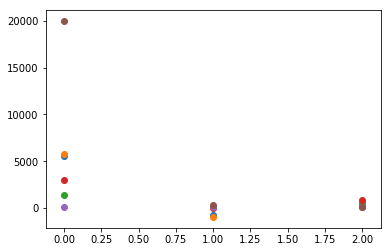

1.0
0.466666666667
[ 0.   0.   1.   0.8  0.2  0.8]
2017-02-13 18:00:00
 

#####


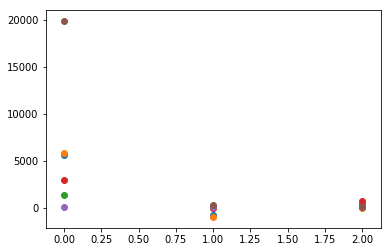

1.0
0.266666666667
[ 0.   0.   0.8  0.2  0.   0.6]
2017-02-13 22:00:00
 

#####


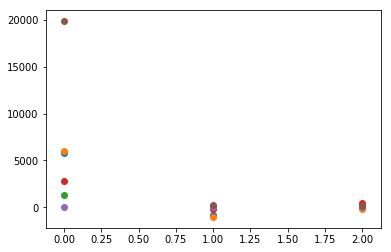

1.0
0.333333333333
[ 0.   0.   1.   0.4  0.   0.6]
2017-02-14 02:00:00
 

#####


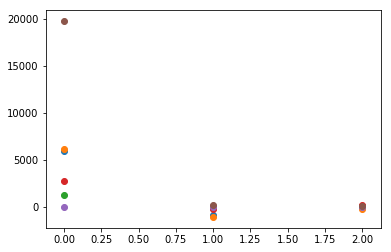

1.0
0.3
[ 0.   0.   0.6  0.8  0.   0.4]
2017-02-14 06:00:00
 

#####


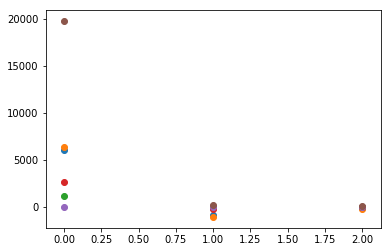

0.0
0.133333333333
[ 0.   0.   0.   0.2  0.2  0.4]
2017-02-14 10:00:00
 

#####


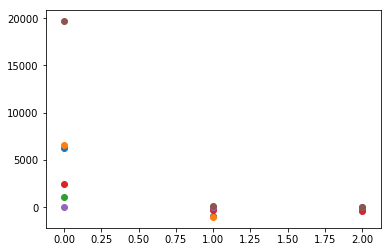

0.0
0.3
[ 0.   0.   0.8  0.6  0.   0.4]
2017-02-14 14:00:00
 

#####


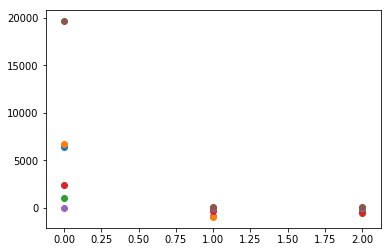

0.0
0.366666666667
[ 0.   0.   1.   0.8  0.   0.4]
2017-02-14 18:00:00
 

#####


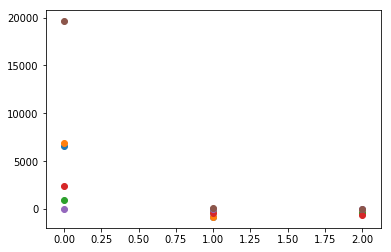

0.0
0.333333333333
[ 0.   0.   1.   0.8  0.   0.2]
2017-02-14 22:00:00
 

#####


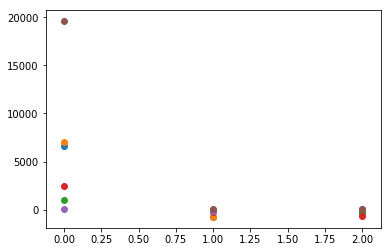

0.0
0.233333333333
[ 0.   0.   0.   0.8  0.6  0. ]
2017-02-15 02:00:00
 

#####


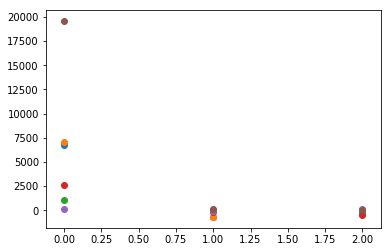

0.0
0.233333333333
[ 0.   0.   0.8  0.6  0.   0. ]
2017-02-15 06:00:00
 

#####


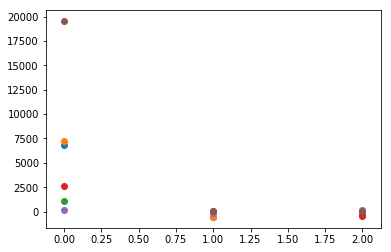

1.0
0.433333333333
[ 0.   0.   1.   0.6  1.   0. ]
2017-02-15 10:00:00
 

#####


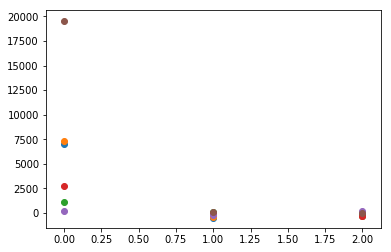

1.0
0.466666666667
[ 0.8  0.   0.6  1.   0.2  0.2]
2017-02-15 14:00:00
 

#####


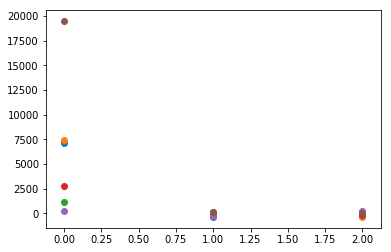

1.0
0.366666666667
[ 0.   0.   0.2  0.8  1.   0.2]
2017-02-15 18:00:00
 

#####


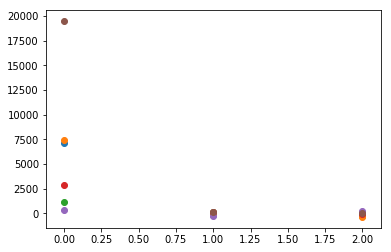

1.0
0.566666666667
[ 0.4  0.2  0.8  1.   1.   0. ]
2017-02-15 22:00:00
 

#####


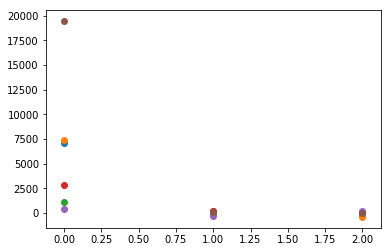

1.0
0.7
[ 0.6  1.   1.   0.6  1.   0. ]
2017-02-16 02:00:00
 

#####


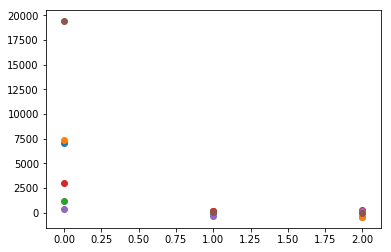

1.0
0.633333333333
[ 1.   1.   0.8  0.   1.   0. ]
2017-02-16 06:00:00


In [134]:
for t in range(30):
    time = t * 4
    view_x(time, X_test)  # no danger
    print(X_test_meta[time].mean())
    print(X_test_meta[time])
    print(y_test.index[time])

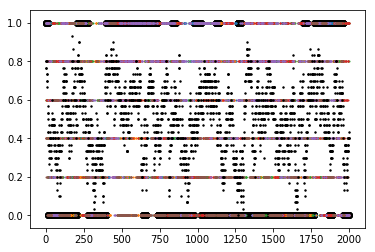

In [135]:
plt.scatter(range(len(y_test)), y_test.values, c='k')
for s in range(X_test_meta.shape[-1]):
    plt.scatter(range(len(X_test_meta)), X_test_meta[:, s], s=1)
# not very helpful, therefore:
    
plt.scatter(range(len(X_test_meta)), X_test_meta.mean(axis=1), s=2, c='k')
    
plt.show()
# n_estimators = 5

In [136]:
cols = ['Temperature_m', 'Temperature_tl', 'Wind_Speed_Average_tl',
        'Wind_Speed_Maximum_tl', 'precip', 'depth',]

mse = {}
for s in range(len(cols)):
    mse[cols[s]] = sum((X_test_meta[:, s] - y_test.values) ** 2) / len(y_test)
    
print(mse)
# n_estimators = 5

{'depth': 0.26604000000000355, 'Wind_Speed_Average_tl': 0.37103999999999843, 'Temperature_m': 0.3731799999999989, 'Wind_Speed_Maximum_tl': 0.40387999999999891, 'precip': 0.34105999999999825, 'Temperature_tl': 0.34477999999999803}
